In [1]:
from utils.RunDocumentExperiment import RunDocumentExperiment

from models.UrlsEmbedding import Clustering_algorithm, Scale

%matplotlib inline

In [30]:
direct = "/Volumes/Macintosh HD/Users/Andrea/Desktop/"

site = "cs.stanford.edu" # cs.illinois.edu  cs.ox.ac.uk  cs.priceton.edu  cs.stanford.edu
type_site = "NoConstraint" # ListConstraint  NoConstraint

use_tfidf = True
dimension_deduction = 100

clustering = Clustering_algorithm.HDBscan
intersect = True

scaling = Scale.l2
separator = "\t"

In [31]:
%time e = RunDocumentExperiment(direct, site, type_site, clustering, use_tfidf, separator, scaling, intersect, dimension_deduction)

use tfidf
Fitting tfidf...


Create tf-idf matrix, shape:  (436, 949)
Performing lsa dimensional reduction with dimension=100


Dimensionality reduction with lsa, shape:  (436, 100)
scaling embeddings with L2 normalization
Intersecting...
Original urls: 436
Intersected urls: 167
length content: 167
Start running HDBscan
Homogeneity: 0.191070261053
Completeness: 0.368649713255
V-Measure core: 0.25169013143
Adjusted Rand index: 0.06109346300660073
Mutual Information: 0.152772880215
Silhouette: -0.0676099785358
CPU times: user 5.26 s, sys: 162 ms, total: 5.42 s
Wall time: 5.45 s


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:193: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 167 but corresponding boolean dimension is 146
  a = np.mean(distances_row[mask])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/cluster/unsupervised.py:219: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 167 but corresponding boolean dimension is 146
  for cur_label in set(labels) if not cur_label == label])


In [32]:
e.get_dataframe_content()

,Adj Mutual info,Adj Rand index,Completeness,Homogeneity,Silhouette,V-Measure
HDBScan,0.15,0.06,0.37,0.19,-0.07,0.25


/Volumes/Macintosh HD/Users/Andrea/Desktop/cs.stanford.edu/NoConstraint/:TFIDF


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

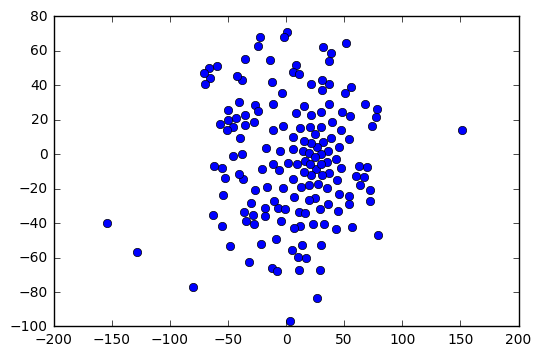

In [33]:
direct = direct + site + "/" + type_site + "/"

if use_tfidf:
    string = "TFIDF"
else:
    string = "doc2vec"

print(direct + ":" + string)
e.plot_normalized_content(direct + "PURE_" + string + "." + clustering.value)